Problem Statement:  



The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [1]:
# Importing Necessery liabraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)


In [2]:
#Importing dataset

df = pd.read_csv(r"C:\Users\Abhijeet\Desktop\My Data\Files-main\wine.csv")

In [3]:
# Checking the dataset
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [4]:
df.shape

(1599, 13)

Here we have 1599 rows and 13 diffrent columns in our datset.

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Alcohol_content', 'quality'],
      dtype='object')

In [6]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  Alcohol_content       1599 non-null   object 
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


We have only one column of Object datatype, rest all are integers

In [7]:
df.describe()
# Cheking How data is spread

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We can see we have high max values for residual sugar, free sulfur dioxide, total sulfur dioxide it may have outliers

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

No null values present in our dataset


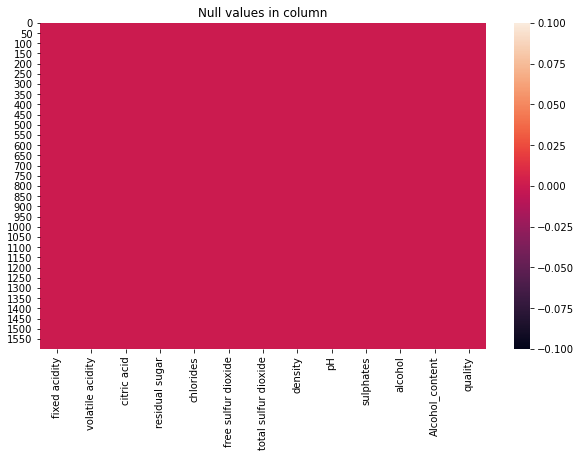

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.title("Null values in column")
plt.show()
# Visual Representaion of missing values in cabin and Age column

In [10]:
# Checking for Duplicated values
df.duplicated().sum()

240

In [11]:
# Dropping Duplicated
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(1359, 13)

In [14]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<function matplotlib.pyplot.show(close=None, block=None)>

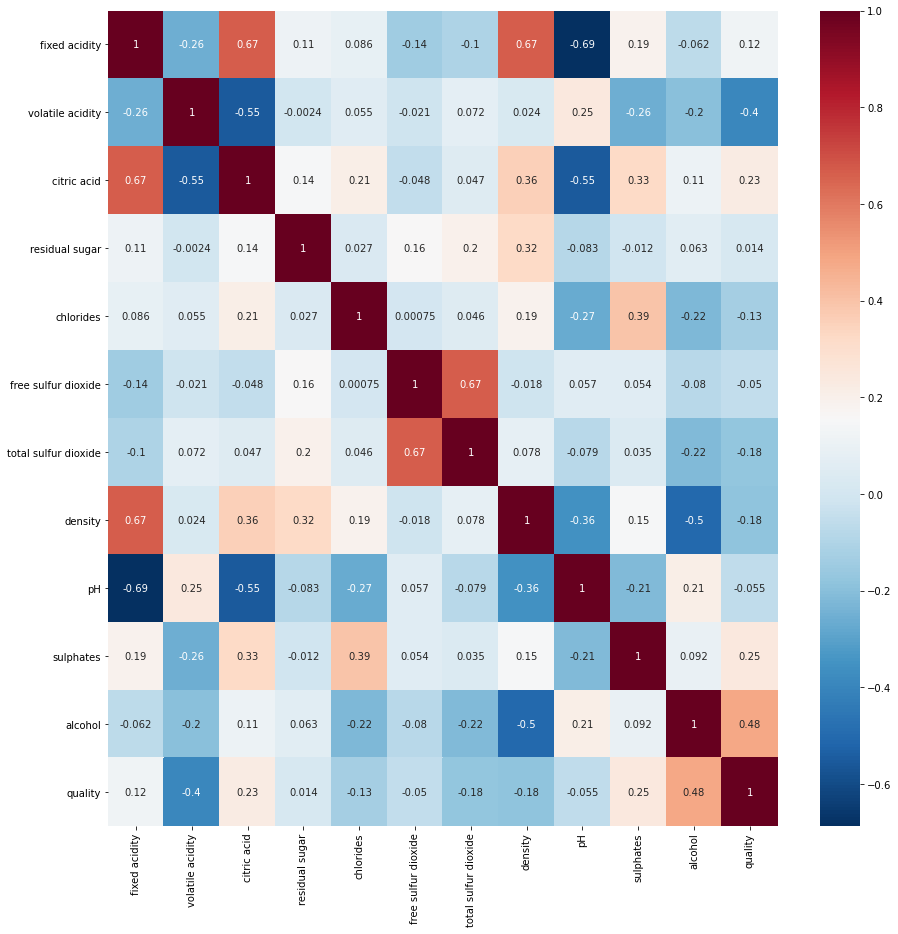

In [15]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True,cmap="RdBu_r")
plt.show

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Alcohol_content', 'quality'],
      dtype='object')

We Can see in the heatmapthat fixed acidity, citric acid,residual sugar,sulphates,alcohol are positively related with the wine quality

Also volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH are negatively correlated with the target variabel

Also Our target column has highest corrrelation with the alchol column

In [17]:
df['Alcohol_content'].value_counts()

Medium    692
High      404
Low       263
Name: Alcohol_content, dtype: int64

In [18]:
# Converting Alchohol contents into integers

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

df['Alcohol_content'] = lab.fit_transform(df['Alcohol_content'])

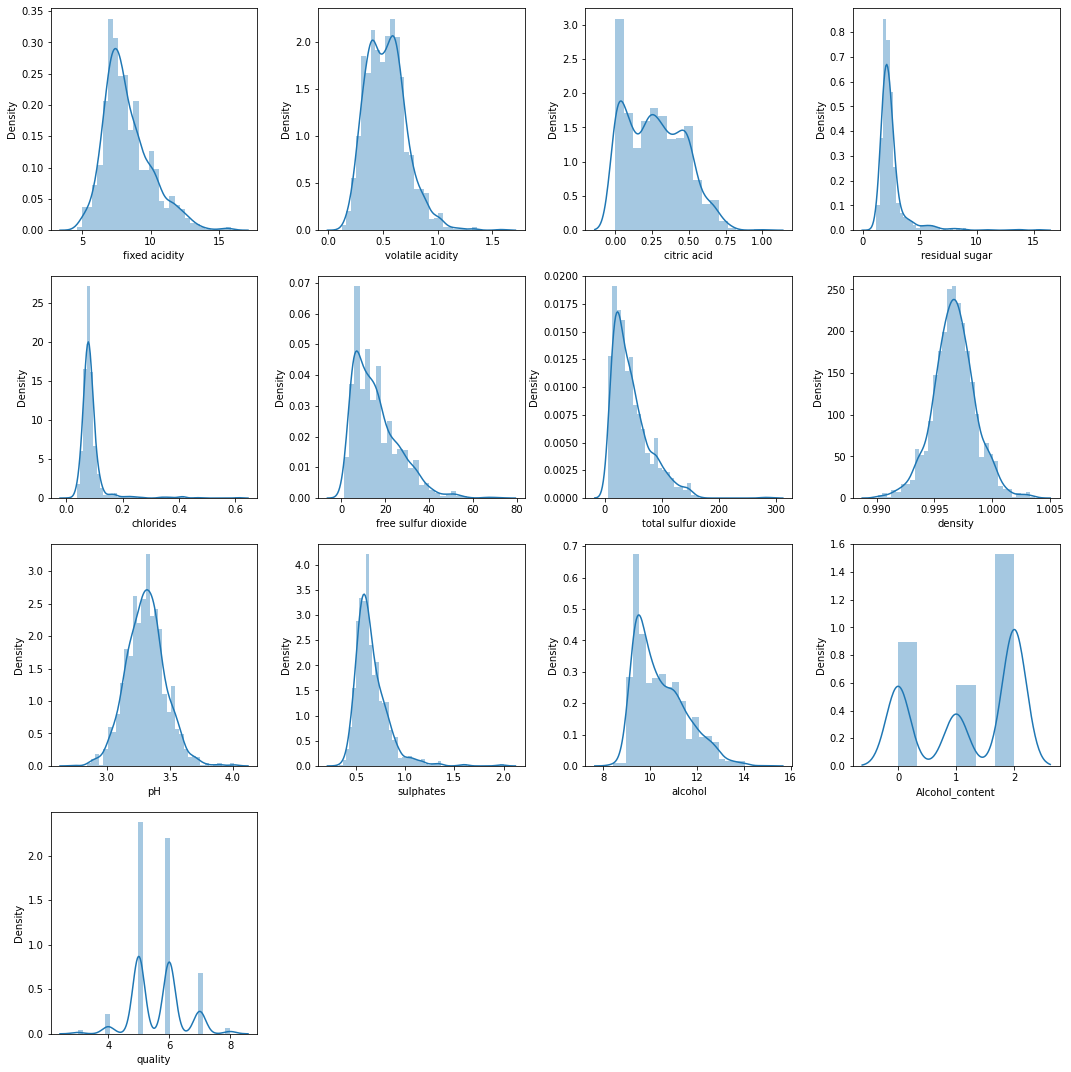

In [19]:
# Checking data Distribution

plt.figure(figsize = (15,15), facecolor = 'white')

plotnumber = 1

for column in df:
    if plotnumber <=14:
        ax = plt.subplot(4,4, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.tight_layout()

We can see almost all of the columns has skewness we need to deal with it 

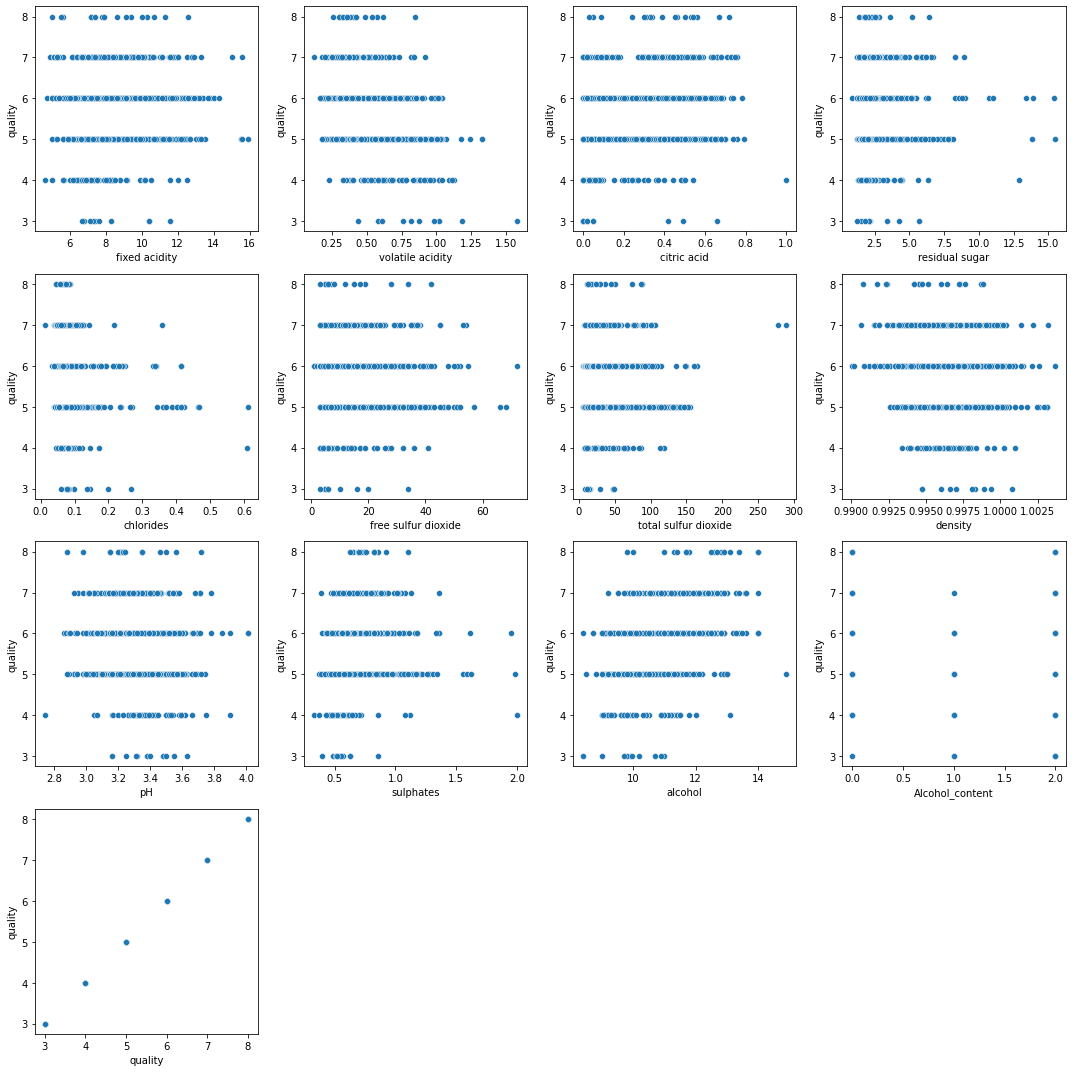

In [20]:
plt.figure(figsize = (15,15), facecolor = 'white')

plotnumber = 1

for column in df:
    if plotnumber <=14:
        ax = plt.subplot(4,4, plotnumber)
        sns.scatterplot(x = df[column], y =df['quality'] )
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.tight_layout()

We can see from both of sbove plots that - 

*fixed acidity is distributed between 2 to 14 and has outliers

*volatile acidity is distributed between 0.25 to 1 and may have outliers

*citric acid is distributed between 0 to 0.8 

*residual sugar acidity is distributed between 2 to  10 and has outliers

*chlorides is distributed between 0 to .5

*free sulfur dioxide is distributed between 0 to 50 

*total sulfur dioxide is distributed between 0 to 150 


*pH is distributed between 2.8 to 3.8 

*sulphates is distributed between0 to 0 to 1.5

<AxesSubplot:xlabel='Alcohol_content', ylabel='count'>

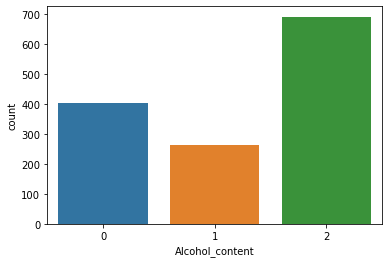

In [21]:
sns.countplot(df['Alcohol_content'])

 We can see that we have more readings with medium alchohol content

In [22]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Alcohol_content', 'quality'],
      dtype='object')

In [23]:
# Let us divide our label into good (above 7 ) and Not good (below7 ) 

wine_quality = []
for i in df['quality']:
    if i >=7:
        wine_quality.append(1)
        
    else:
        wine_quality.append(0)
        

In [24]:
df['wine_quality'] = wine_quality 

<AxesSubplot:xlabel='wine_quality', ylabel='count'>

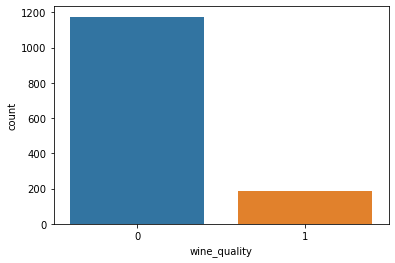

In [25]:
sns.countplot(df['wine_quality'])

We can see here we have more rows for wine quality not good than good wine quality

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


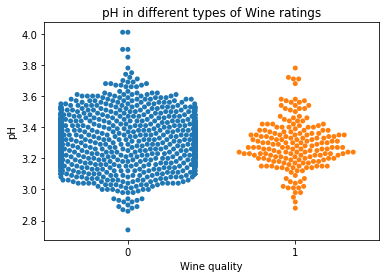

In [26]:
sns.swarmplot(x="wine_quality", y="pH", data = df)
plt.xlabel('Wine quality')
plt.ylabel('pH'),
plt.title('pH in different types of Wine ratings')
plt.show()

In [27]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Alcohol_content', 'quality',
       'wine_quality'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


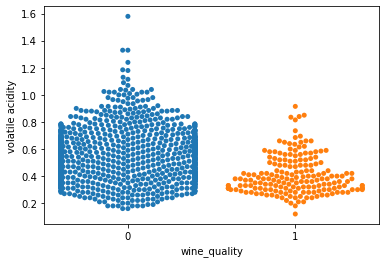

In [28]:
sns.swarmplot(x="wine_quality", y="volatile acidity", data = df)
plt.show()

We can see in above graph a good wine contains 0 to 0.8 Volatile acid

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


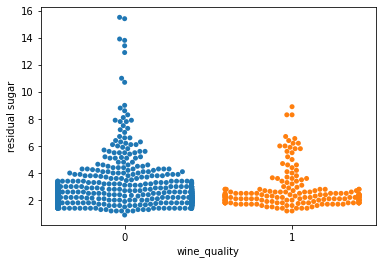

In [29]:
sns.swarmplot(x="wine_quality", y="residual sugar", data = df)
plt.show()

We also can see the good wine contains 1 to 6 residual suger

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


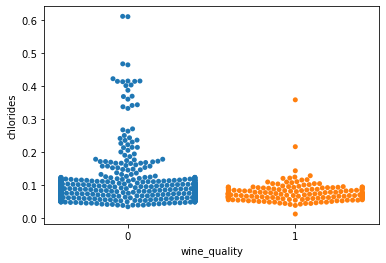

In [30]:
sns.swarmplot(x="wine_quality", y="chlorides", data = df)
plt.show()

Above graph shows that to make a good wine chlorides should be in range 0 to 0.15


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


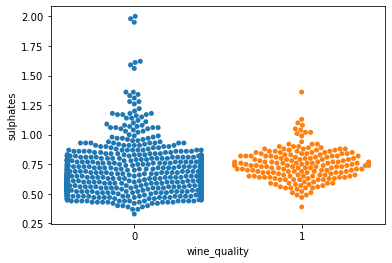

In [31]:
#total sulfur dioxide
sns.swarmplot(x="wine_quality", y="sulphates", data = df)
plt.show()

Good wine contains sulphates ranging 0.40 to 1.20

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-p

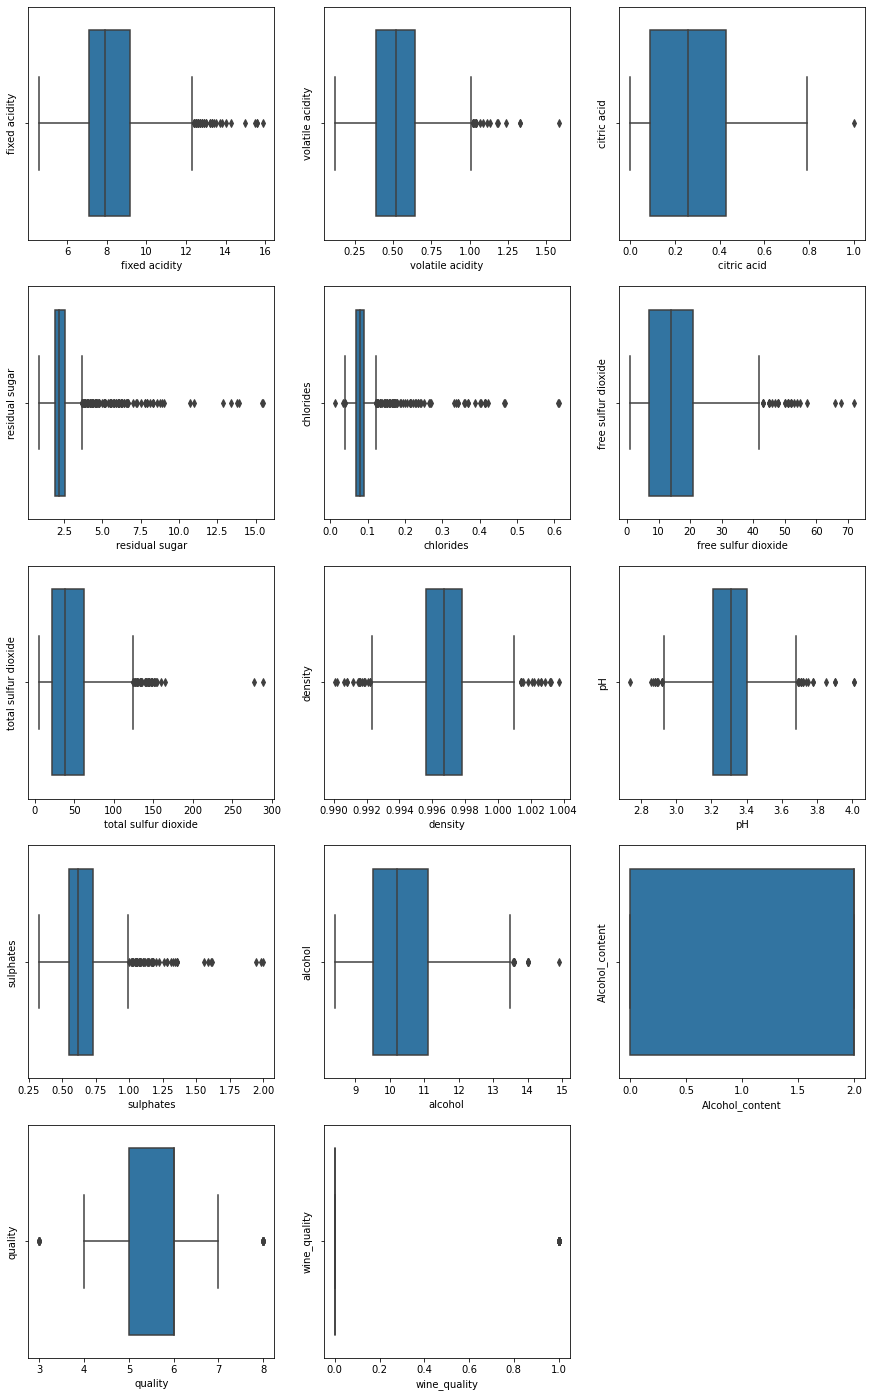

In [32]:
# Checking for outliers

plt.figure(figsize = (15,30))
graph = 1

for column in df:
    if graph <=16:
        ax = plt.subplot(6,3,graph)
        sns.boxplot(df[column], orient ='v')
        plt.xlabel(column,fontsize=10)
        plt.ylabel(column,fontsize=10)
    graph+=1   
plt.show()

We can see lot of our columns have outliers

In [33]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Alcohol_content', 'quality',
       'wine_quality'],
      dtype='object')

In [34]:
df.shape

(1359, 14)

In [35]:
# Removing outliers with  z-score
from scipy.stats import zscore

z_score = zscore(df[['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','density','sulphates']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)

df= df[filtering_entry]

In [36]:
df.shape

(1256, 14)

In [37]:
# Checking data lost

print ('Data lost = ', ((1359-1256)/1359)*100 , '%')

Data lost =  7.579102281089035 %


In [43]:
x= df.drop(df[['quality','wine_quality']], axis = 1)
y = df['wine_quality']

In [48]:
# Checking for skewness
x.skew()

fixed acidity           0.753683
volatile acidity        0.444610
citric acid             0.275987
residual sugar          2.378209
chlorides               2.422767
free sulfur dioxide     0.858557
total sulfur dioxide    1.227658
density                -0.047610
pH                      0.416725
sulphates               0.970443
alcohol                 0.803959
Alcohol_content        -0.429090
dtype: float64

In [49]:
# Using Power_transform for removing skewness
from sklearn.preprocessing import power_transform
x_new = power_transform(x)
x=pd.DataFrame(x_new, columns=x.columns)

In [50]:
x.skew()

fixed acidity           0.006865
volatile acidity        0.010473
citric acid             0.015610
residual sugar         -0.011570
chlorides              -0.120258
free sulfur dioxide    -0.022421
total sulfur dioxide   -0.004848
density                 0.001173
pH                     -0.011897
sulphates               0.018685
alcohol                 0.117237
Alcohol_content        -0.379456
dtype: float64

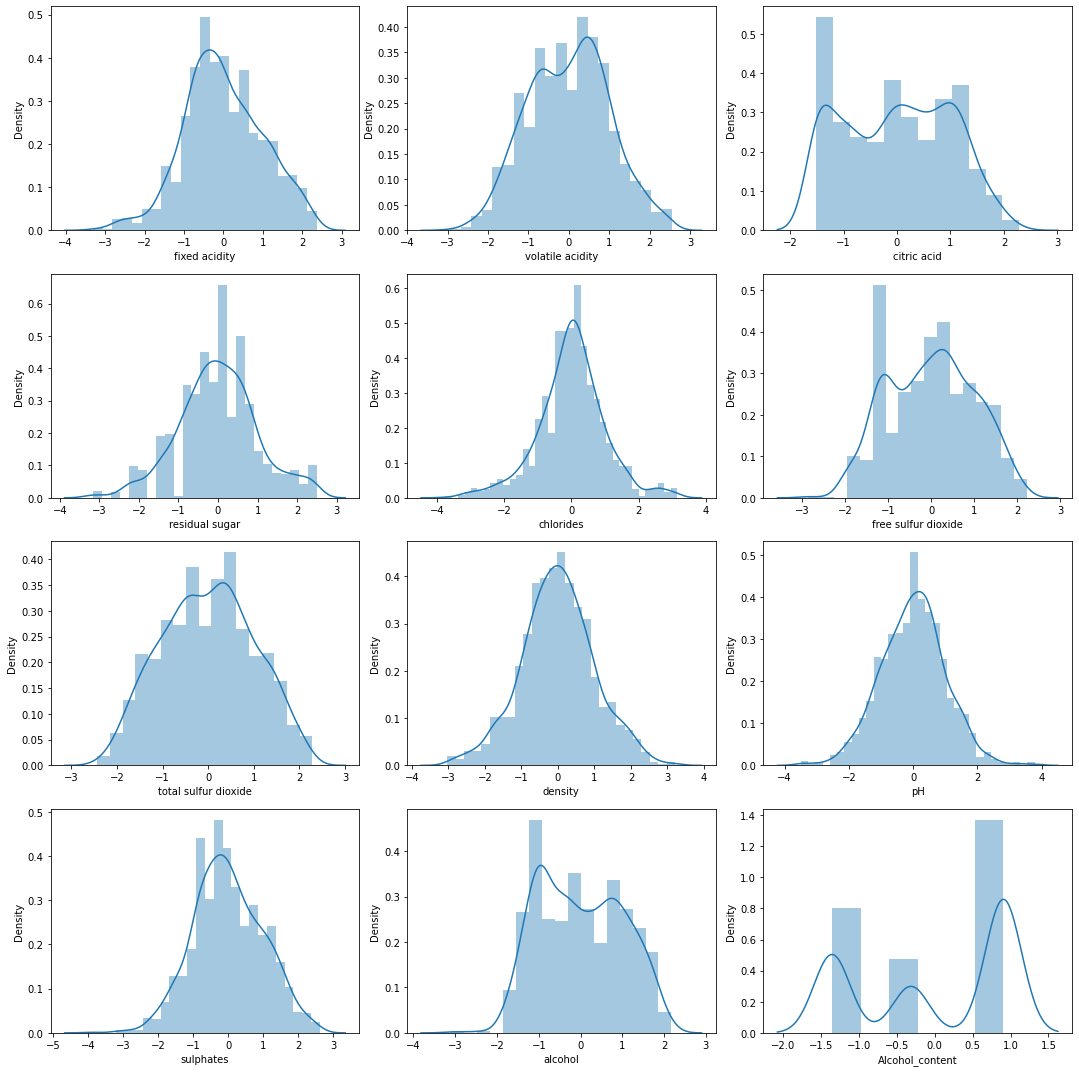

In [51]:
plt.figure(figsize = (15,15), facecolor = 'white')

plotnumber = 1

for column in x:
    if plotnumber <=12:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.tight_layout()

We can see skewness remeoved from all of the columns and data looks somehow normal .

In [53]:
# # Finding best random state to split data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

maxAcc = 0
maxRS=0

for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    acc=accuracy_score(y_test, predf)
    
    if acc>maxAcc:
        maxAcc=acc
        macRS = i
print('Best Accuracy=',maxAcc, "Random state=",macRS)    


Best Accuracy= 0.9267515923566879 Random state= 178


In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=178)

In [56]:
#ModeL building with Logistic Regression
LR.fit(x_train,y_train)

predict_=LR.predict(x_test)

print("Accuracy",accuracy_score(y_test,predict_)*100)

print(confusion_matrix(y_test,predict_))
print(classification_report(y_test,predict_))


Accuracy 92.67515923566879
[[276   3]
 [ 20  15]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       279
           1       0.83      0.43      0.57        35

    accuracy                           0.93       314
   macro avg       0.88      0.71      0.76       314
weighted avg       0.92      0.93      0.92       314



In [57]:
#ModeL building with Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)
pred = dt.predict(x_test)

print("Accuracy",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


Accuracy 0.821656050955414
[[244  35]
 [ 21  14]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       279
           1       0.29      0.40      0.33        35

    accuracy                           0.82       314
   macro avg       0.60      0.64      0.62       314
weighted avg       0.85      0.82      0.83       314



In [59]:
#ModeL building with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train,y_train)
pred = rf.predict(x_test)

print('Accurecy',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accurecy 90.76433121019109
[[273   6]
 [ 23  12]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       279
           1       0.67      0.34      0.45        35

    accuracy                           0.91       314
   macro avg       0.79      0.66      0.70       314
weighted avg       0.89      0.91      0.89       314



In [60]:
#ModeL building with SVC
from sklearn.svm import SVC
svc=SVC()

svc.fit(x_train,y_train)
new_pred = svc.predict(x_test)

print('Accurecy',accuracy_score(y_test,new_pred)*100)
print(confusion_matrix(y_test,new_pred))
print(classification_report(y_test,new_pred))

Accurecy 92.35668789808918
[[278   1]
 [ 23  12]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       279
           1       0.92      0.34      0.50        35

    accuracy                           0.92       314
   macro avg       0.92      0.67      0.73       314
weighted avg       0.92      0.92      0.91       314



In [61]:
# Cross Validation
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x,y, cv=8)
print("Cross validation score for Logistic Regression is", scr.mean())
scr = cross_val_score(dt, x,y, cv=8)
print("Cross validation score for Decision tree is", scr.mean())
scr = cross_val_score(rf, x,y, cv=8)
print("Cross validation score for RandomForestClassifier is", scr.mean())
scr = cross_val_score(svc, x,y, cv=8)
print("Cross validation score for svc is", scr.mean())



Cross validation score for Logistic Regression is 0.8734076433121019
Cross validation score for Decision tree is 0.8152866242038217
Cross validation score for RandomForestClassifier is 0.8773885350318472
Cross validation score for svc is 0.8757961783439491


We can see our SVC model Performing better than others

In [75]:
# HyperParameter Tunning for SVC

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100,1000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

In [76]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.3s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [77]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.01)


In [79]:
grid_pred = grid.best_estimator_.predict(x_test)

accuracy_score(y_test, grid_pred)

0.910828025477707

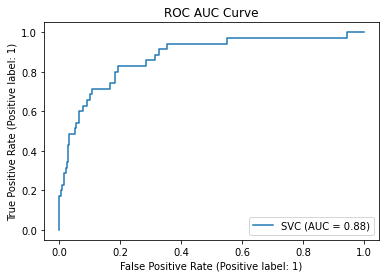

In [80]:
# ROC AUC Curve

from sklearn.metrics import plot_roc_curve

plot_roc_curve(grid.best_estimator_,x_test, y_test)

plt.title("ROC AUC Curve")

plt.show()

In [81]:
# Saving Model

import joblib


joblib.dump(grid.best_estimator_,"Wine_pred_class.pkl")

['Wine_pred_class.pkl']